In [26]:
import pandas as pd

In [27]:
df = pd.read_excel("test_excel_file.xlsx")
df

,Строка,Адрес,Коэффициент
0,1,"улица Электрическая, 9а, Ногинск, 142407",584.0
1,2,"Ашхабадская, 27 к3, ​Реутов, 143964",90.0
2,3,"3-я Кабельная улица, 2, Москва ...",166.0
3,4,"Советская, 44, Ногинск, 142400",195.0
4,5,"Леснова, 7, Ногинск, 142400",948.0
5,6,"Ленинградский проспект, 67 к1, Москва, 125057",473.0
6,7,"улица Нагорная, 23 к1, Москва, 117186",555.0
7,8,"Ашхабадская, 27 к3, ​Реутов, 143964",120.0
8,9,"Декабристов, 8, Ногинск , 142400",NaN


In [28]:
df["Улица"] = df["Адрес"].str.split(",").str[0].str.strip()
df["Дом"] = df["Адрес"].str.split(",").str[1].str.strip()
df["Город"] = df["Адрес"].str.split(",").str[2].str.strip()
df["Индекс"] = df["Адрес"].str.split(",").str[3].str.strip()
df = df.drop(columns="Адрес")
df

,Строка,Коэффициент,Улица,Дом,Город,Индекс
0,1,584.0,улица Электрическая,9а,Ногинск,142407
1,2,90.0,Ашхабадская,27 к3,​Реутов,143964
2,3,166.0,3-я Кабельная улица,2,Москва,111024
3,4,195.0,Советская,44,Ногинск,142400
4,5,948.0,Леснова,7,Ногинск,142400
5,6,473.0,Ленинградский проспект,67 к1,Москва,125057
6,7,555.0,улица Нагорная,23 к1,Москва,117186
7,8,120.0,Ашхабадская,27 к3,​Реутов,143964
8,9,NaN,Декабристов,8,Ногинск,142400


In [36]:
# df.groupby(by=['Город']).apply(print)
# df.groupby(by=['Город']).head()
df.groupby(['Город','Улица']).agg({'Коэффициент':['mean','min', 'max'] })

Коэффициент              
                                      mean    min    max
Город   Улица                                           
Москва  3-я Кабельная улица          166.0  166.0  166.0
        Ленинградский проспект       473.0  473.0  473.0
        улица Нагорная               555.0  555.0  555.0
Ногинск Декабристов                    NaN    NaN    NaN
        Леснова                      948.0  948.0  948.0
        Советская                    195.0  195.0  195.0
        улица Электрическая          584.0  584.0  584.0
​Реутов Ашхабадская                  105.0   90.0  120.0

In [30]:
df.describe(include='object')
# count: The count of non-null values
# unique: The number of unique values
# top: The most frequently occurring value
# freq: The count of the most frequently occurring value

,Улица,Дом,Город,Индекс
count,9,9,9,9
unique,8,8,3,6
top,Ашхабадская,27 к3,Ногинск,142400
freq,2,2,4,3


<AxesSubplot: xlabel='Город'>

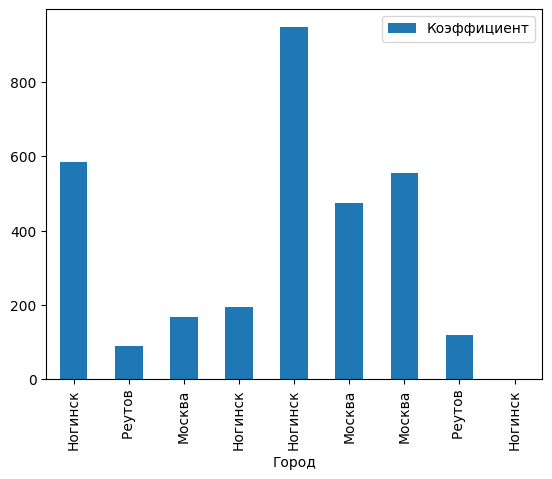

In [53]:
df.plot(kind="bar", x = 'Город', y = 'Коэффициент')